In [2]:
import pandas as pd

df = pd.read_json('data/graph.json')
df_outcomes = df.data['allCourses']
df_outcomes

[{'_id': '534',
  'submissionsConnection': {'nodes': [{'submissionHistoriesConnection': {'nodes': [{'attempt': 1,
        'user': {'_id': '20592', 'email': 'n.geilen@student.fontys.nl'},
        'rubricAssessmentsConnection': {'nodes': []}},
       {'attempt': 2,
        'user': {'_id': '20592', 'email': 'n.geilen@student.fontys.nl'},
        'rubricAssessmentsConnection': {'nodes': []}}]},
     'assignment': {'_id': '232501', 'name': 'Competence Document NJ2023'}},
    {'submissionHistoriesConnection': {'nodes': [{'attempt': 1,
        'user': {'_id': '20592', 'email': 'n.geilen@student.fontys.nl'},
        'rubricAssessmentsConnection': {'nodes': []}},
       {'attempt': 2,
        'user': {'_id': '20592', 'email': 'n.geilen@student.fontys.nl'},
        'rubricAssessmentsConnection': {'nodes': []}}]},
     'assignment': {'_id': '202613', 'name': 'Competence Document VJ2022'}},
    {'submissionHistoriesConnection': {'nodes': [{'attempt': 1,
        'user': {'_id': '20592', 'email': 'n

In [60]:
list = {}

for course in df_outcomes:
    for sub in course['submissionsConnection']['nodes']:
        assignmentId = sub['assignment']['_id']
        attempts = sub['submissionHistoriesConnection']['nodes']
        
        for attempt in attempts:
            rubric_nodes = attempt["rubricAssessmentsConnection"]["nodes"]
            if rubric_nodes:
                user_id = attempt['user']['_id']
                if user_id not in list:
                    list[user_id] = {}
                if assignmentId not in list[user_id]:
                    list[user_id][assignmentId] = []
                list[user_id][assignmentId].append(rubric_nodes[0]['score'])
                
            


In [86]:
filtered_list = {
    user: {
        assignment: scores
        for assignment, scores in assignments.items() if len(scores) >= 2
    }
    for user, assignments in list.items() if len(assignments) > 0
}


def replace_none_with_zero(scores):
    return [0 if score is None else score for score in scores]

# Update filtered_list with zero for None
for user, assignments in filtered_list.items():
    for assignment, scores in assignments.items():
        scores = replace_none_with_zero(scores)
        filtered_list[user][assignment] = scores

filtered_list

{'20268': {'239514': [8, 15],
  '239512': [12, 18],
  '213687': [6, 10],
  '239933': [12, 12],
  '241155': [8, 16],
  '240750': [18, 19],
  '212434': [20, 23],
  '240751': [20, 24],
  '220816': [20, 38],
  '213101': [0, 22]},
 '23198': {'193568': [11, 27],
  '202321': [12, 17],
  '220798': [16, 24],
  '193499': [21, 21]},
 '20592': {'193620': [27, 35],
  '202695': [12, 15],
  '220800': [4, 19],
  '202696': [25, 25],
  '211681': [15, 17],
  '201859': [14, 13],
  '231090': [5, 19]},
 '20837': {'192484': [19, 32],
  '240799': [37, 41],
  '238666': [25, 28],
  '220673': [0, 33],
  '213049': [21, 24]},
 '18921': {'236552': [9, 11, 9, 14]},
 '30197': {'236552': [0, 11, 12]},
 '23177': {'236552': [9, 12, 14]},
 '26483': {},
 '20737': {},
 '15423': {},
 '14740': {'236552': [3, 6]},
 '28138': {},
 '25060': {},
 '26111': {},
 '29590': {},
 '14629': {},
 '30314': {},
 '26477': {},
 '20951': {'236552': [3, 9, 10]},
 '26380': {},
 '21274': {'236552': [10, 10]},
 '28462': {},
 '30135': {},
 '21490':

In [87]:
# Function to replace None with zero in scores
def replace_none_with_zero(scores):
    return [0 if score is None else score for score in scores]

# Function to calculate delta change percentage
def calculate_delta_change_percentage(scores):
    return [(scores[i] - scores[i-1]) / scores[i-1] * 100 if scores[i-1] != 0 else 0 for i in range(1, len(scores))]

# Update filtered_list with zero for None and calculate delta changes percentage
for user, assignments in filtered_list.items():
    for assignment, scores in assignments.items():
        scores = replace_none_with_zero(scores)
        delta_changes = calculate_delta_change_percentage(scores)
        filtered_list[user][assignment] = {
            'scores': scores,
            'delta_changes_percentage': delta_changes
        }

# Filter out users who do not have assignments/scores
filtered_list = {
    user: assignments
    for user, assignments in filtered_list.items()
    if any(scores['scores'] for scores in assignments.values())
}

filtered_list

{'20268': {'239514': {'scores': [8, 15], 'delta_changes_percentage': [87.5]},
  '239512': {'scores': [12, 18], 'delta_changes_percentage': [50.0]},
  '213687': {'scores': [6, 10],
   'delta_changes_percentage': [66.66666666666666]},
  '239933': {'scores': [12, 12], 'delta_changes_percentage': [0.0]},
  '241155': {'scores': [8, 16], 'delta_changes_percentage': [100.0]},
  '240750': {'scores': [18, 19],
   'delta_changes_percentage': [5.555555555555555]},
  '212434': {'scores': [20, 23], 'delta_changes_percentage': [15.0]},
  '240751': {'scores': [20, 24], 'delta_changes_percentage': [20.0]},
  '220816': {'scores': [20, 38], 'delta_changes_percentage': [90.0]},
  '213101': {'scores': [0, 22], 'delta_changes_percentage': [0]}},
 '23198': {'193568': {'scores': [11, 27],
   'delta_changes_percentage': [145.45454545454547]},
  '202321': {'scores': [12, 17],
   'delta_changes_percentage': [41.66666666666667]},
  '220798': {'scores': [16, 24], 'delta_changes_percentage': [50.0]},
  '193499': {

In [88]:
import pandas as pd

# Initialize an empty list to store table rows
table_data = []

# Iterate over each user in filtered_list
for user, assignments in filtered_list.items():
    for assignment, data in assignments.items():
        scores = data['scores']
        delta_changes_percentage = data['delta_changes_percentage']
        table_data.append({
            'user_id': user,
            'assignment_id': assignment,
            'scores': scores,
            'delta_changes_percentage': delta_changes_percentage
        })

# Create a DataFrame from the table data
df_table = pd.DataFrame(table_data)

# Display the DataFrame
df_table

,user_id,assignment_id,scores,delta_changes_percentage
0,20268,239514,"[8, 15]",[87.5]
1,20268,239512,"[12, 18]",[50.0]
2,20268,213687,"[6, 10]",[66.66666666666666]
3,20268,239933,"[12, 12]",[0.0]
4,20268,241155,"[8, 16]",[100.0]
...,...,...,...,...
78,29907,236552,"[0, 9, 12]","[0, 33.33333333333333]"
79,18288,236552,"[0, 3, 9]","[0, 200.0]"
80,31225,236552,"[0, 6, 10]","[0, 66.66666666666666]"
81,11129,236552,"[0, 3, 9]","[0, 200.0]"


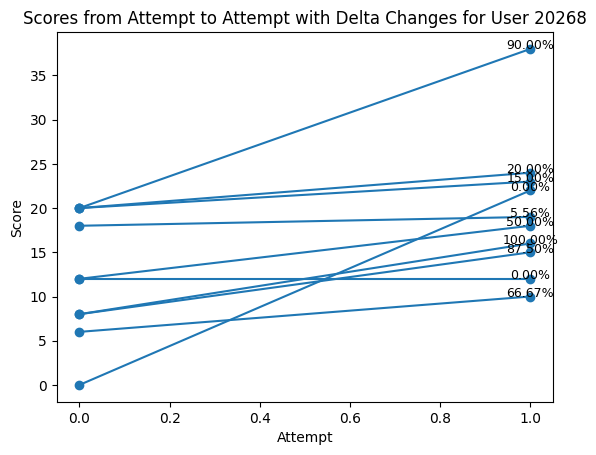

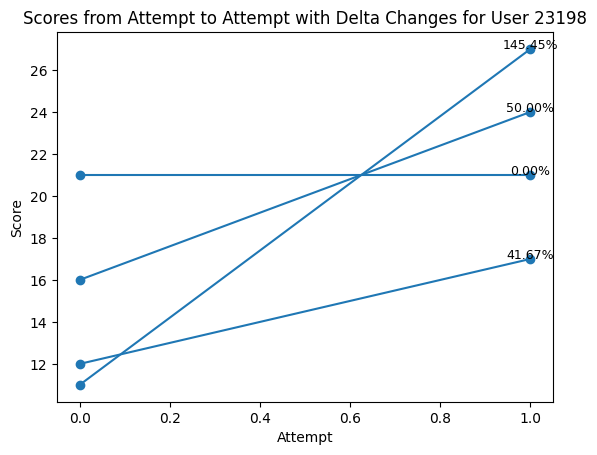

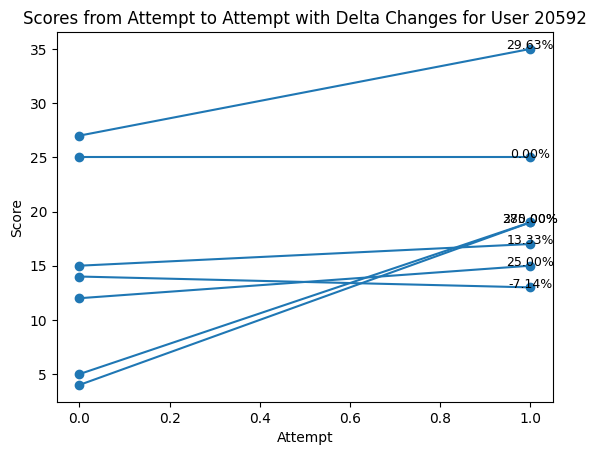

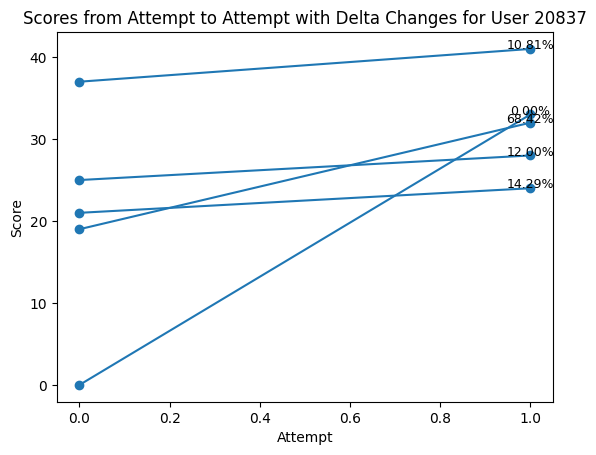

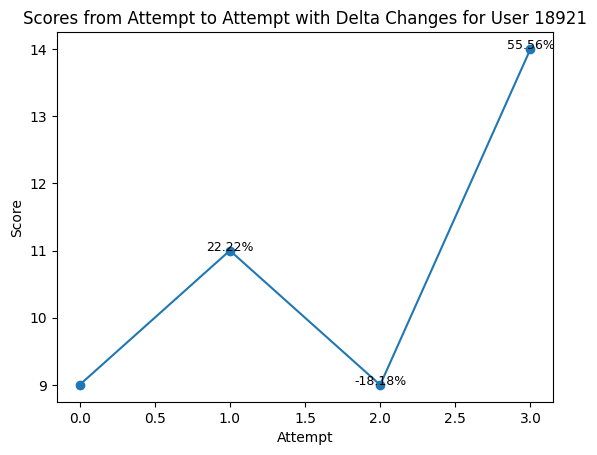

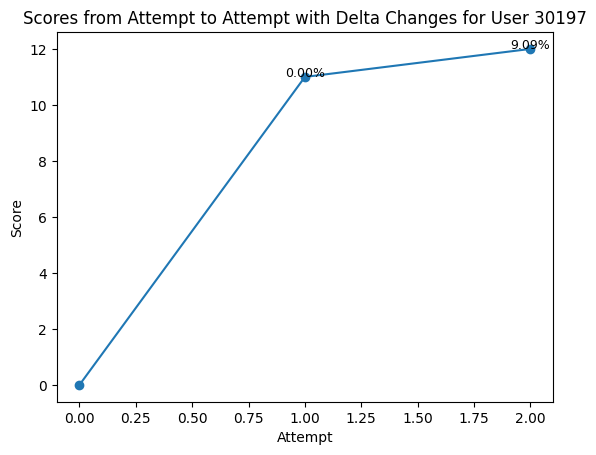

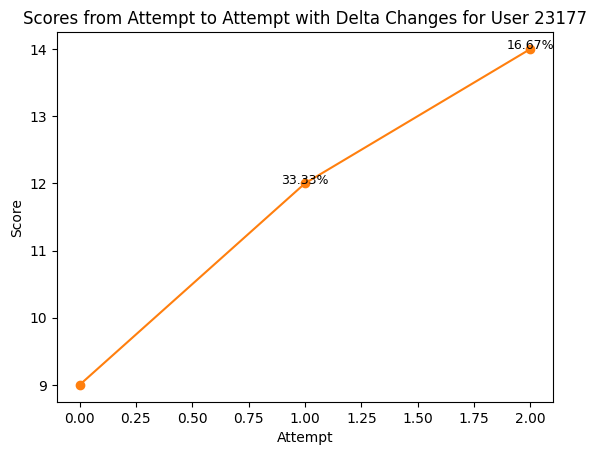

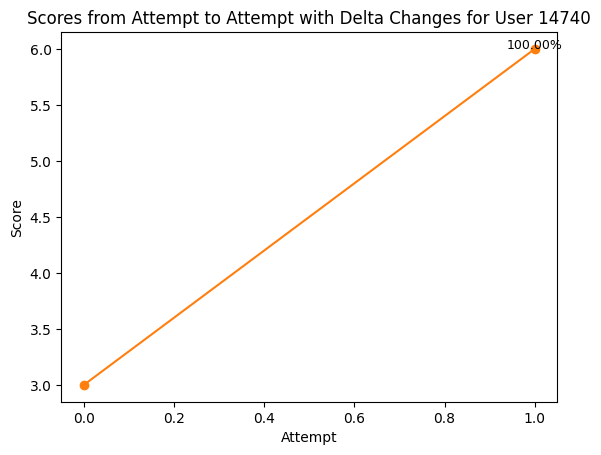

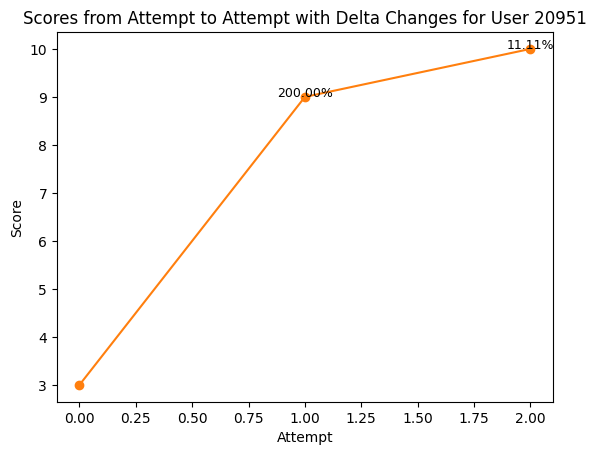

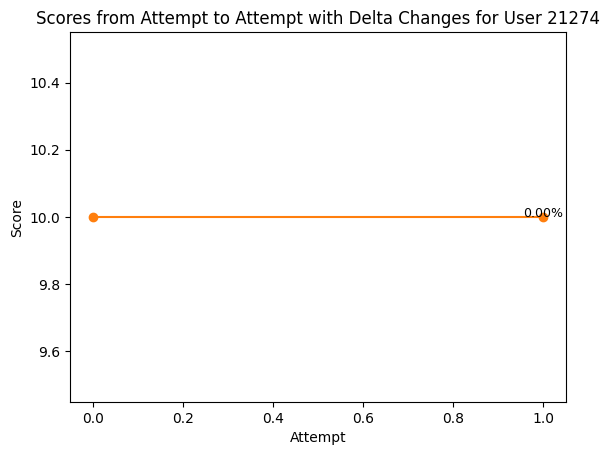

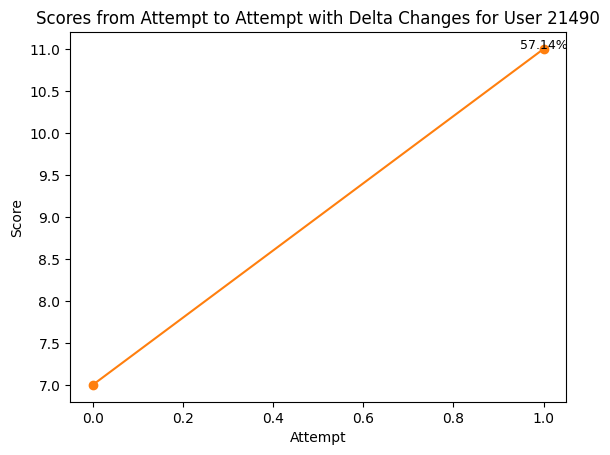

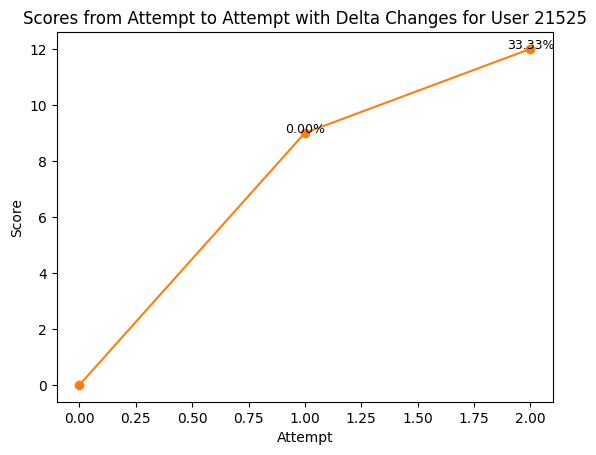

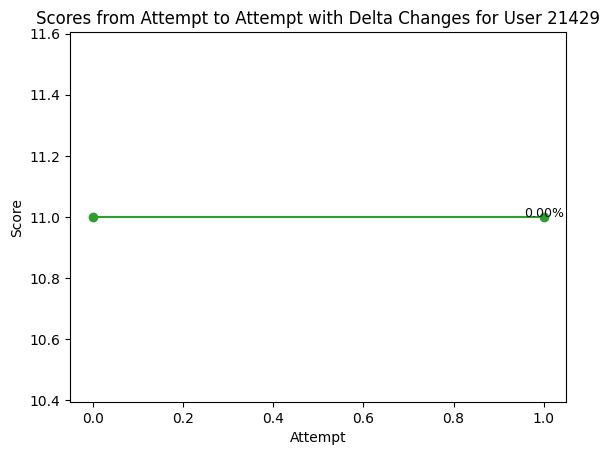

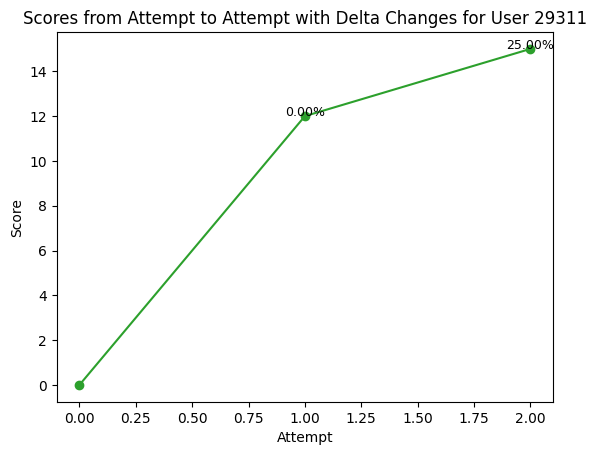

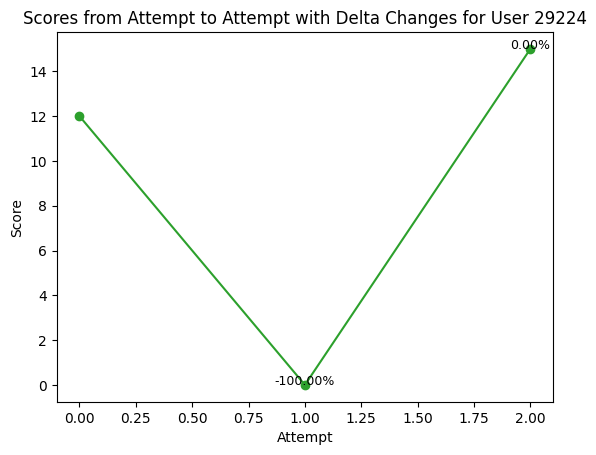

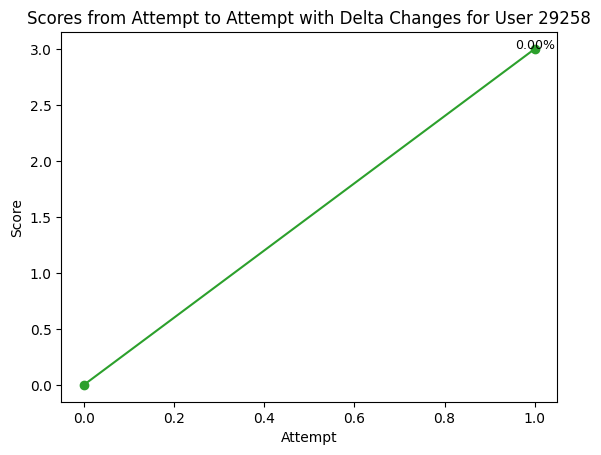

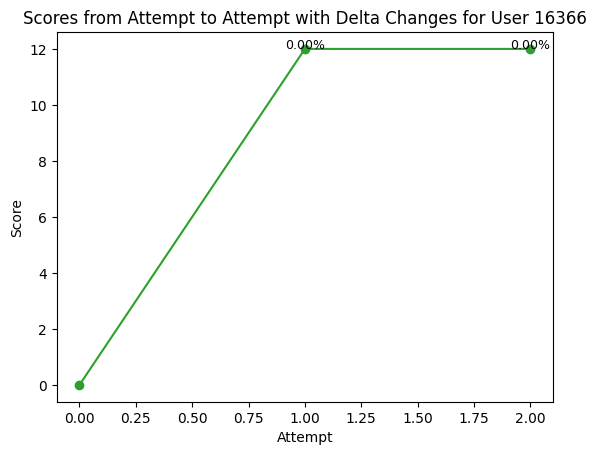

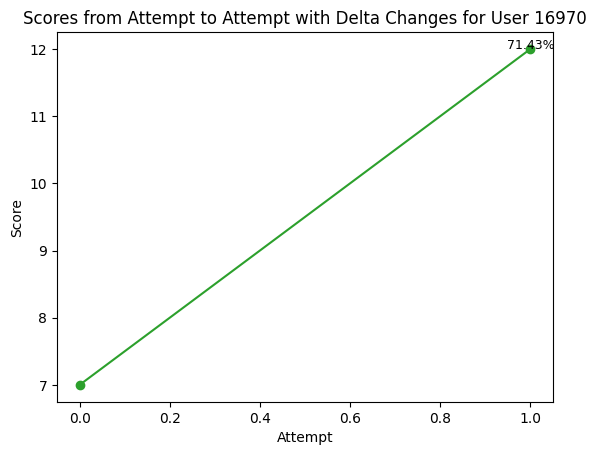

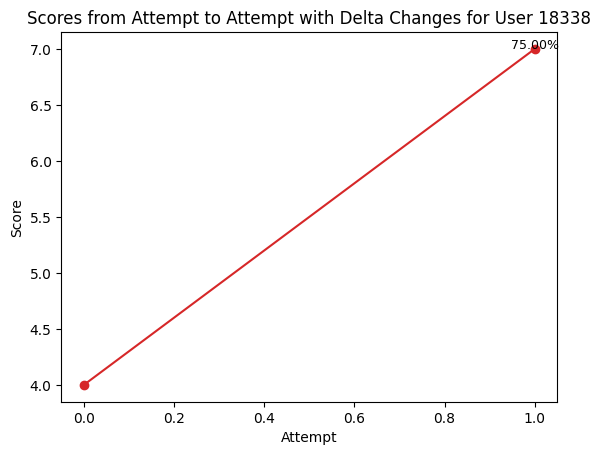

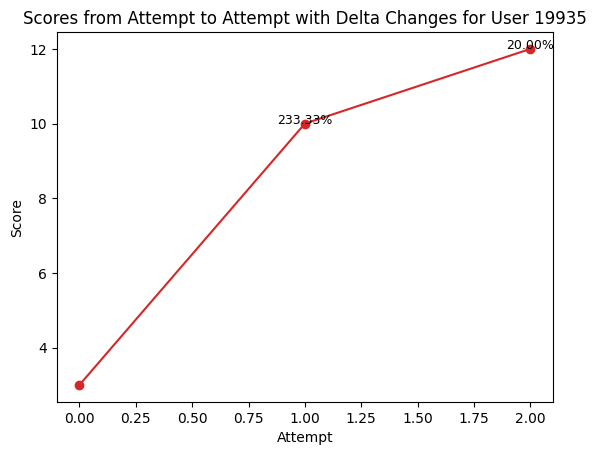

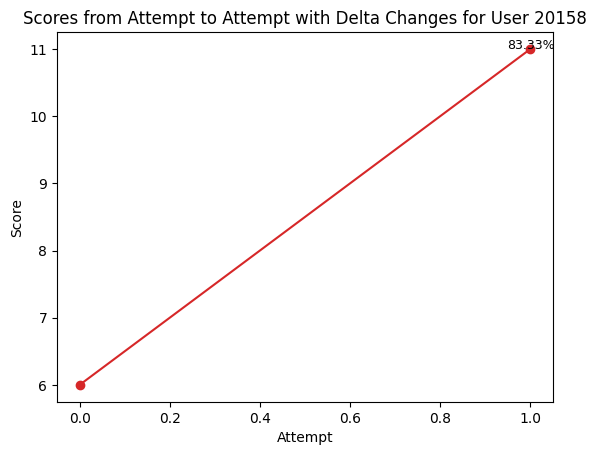

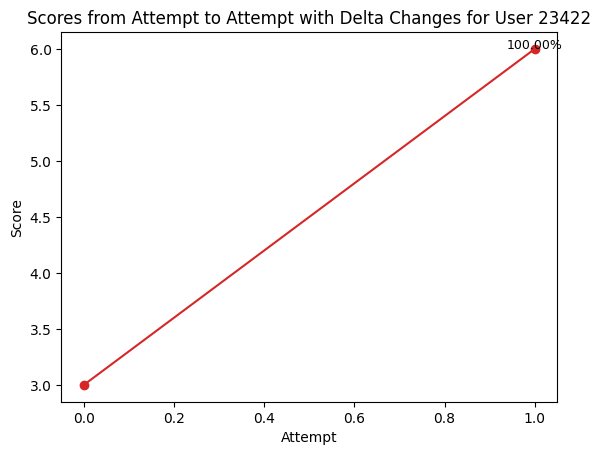

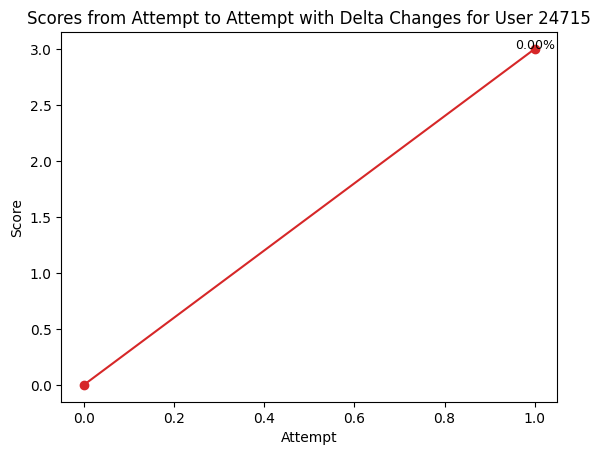

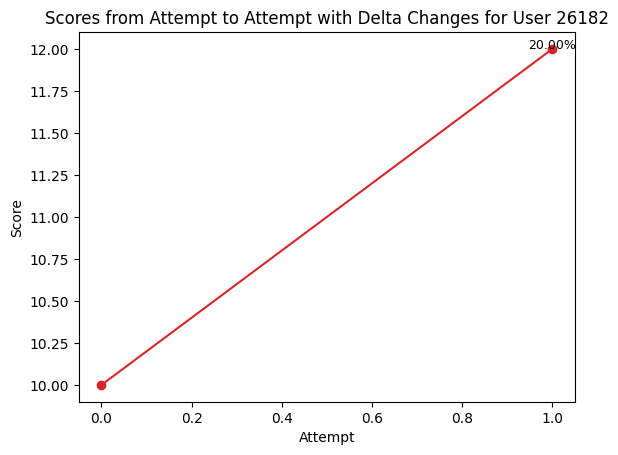

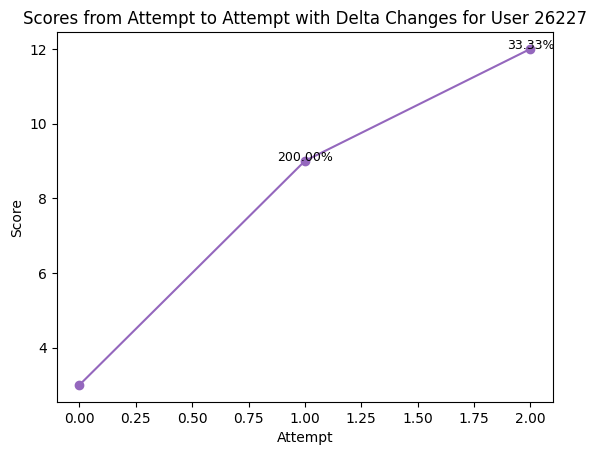

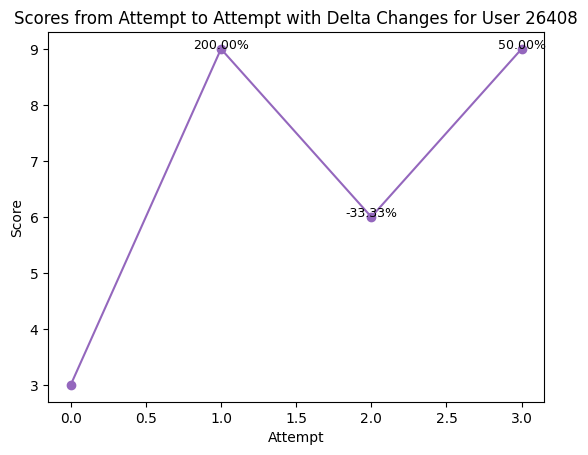

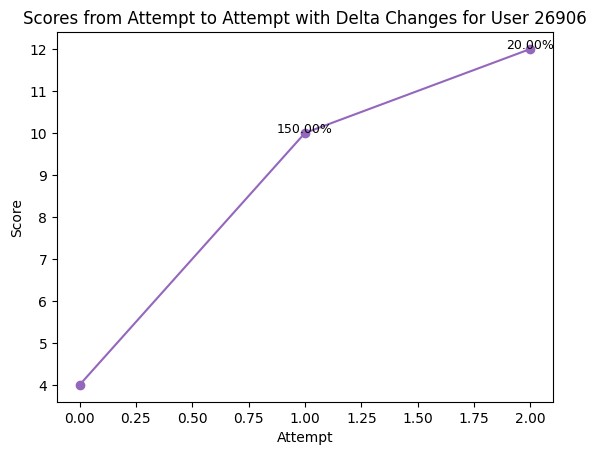

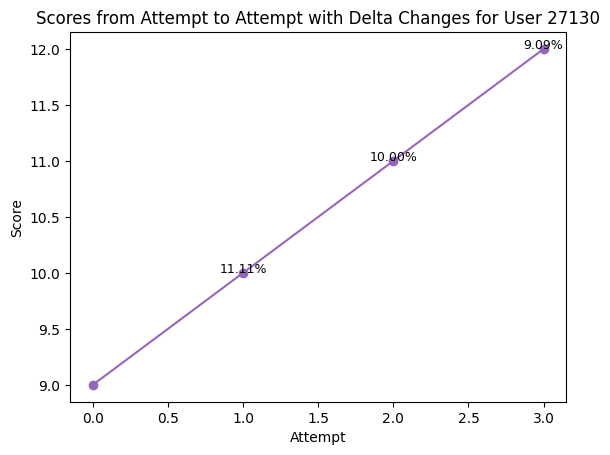

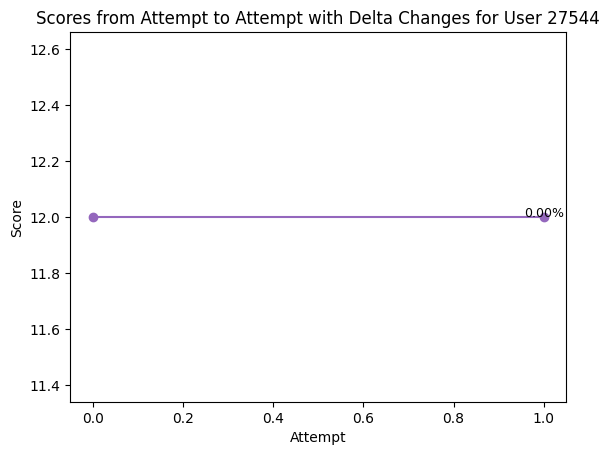

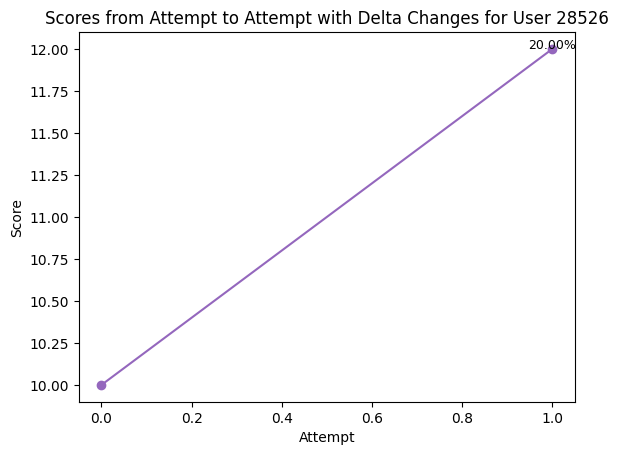

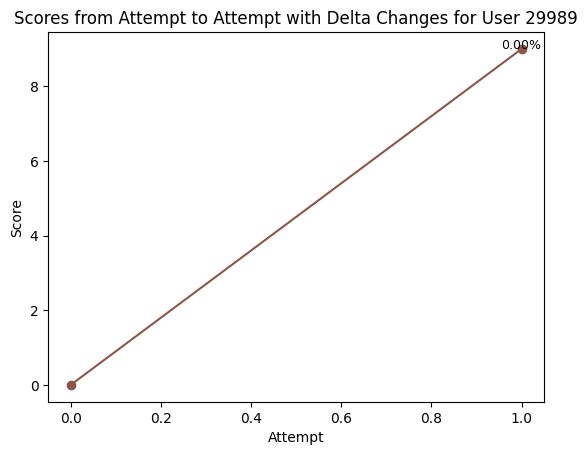

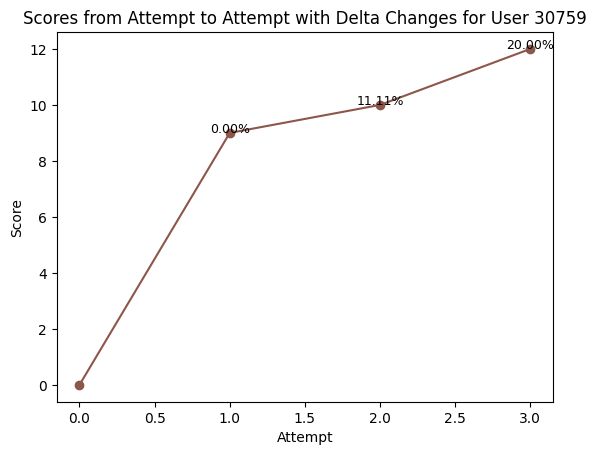

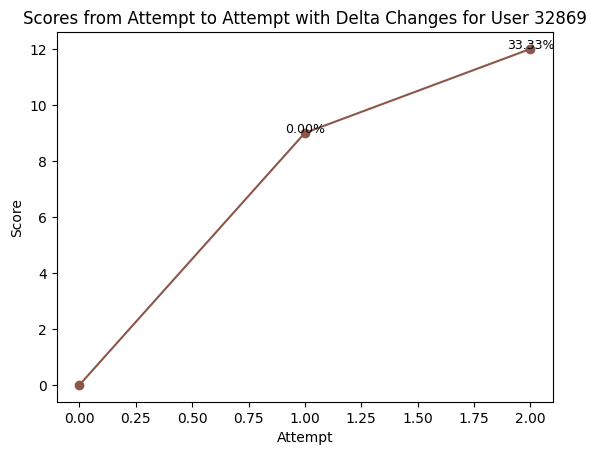

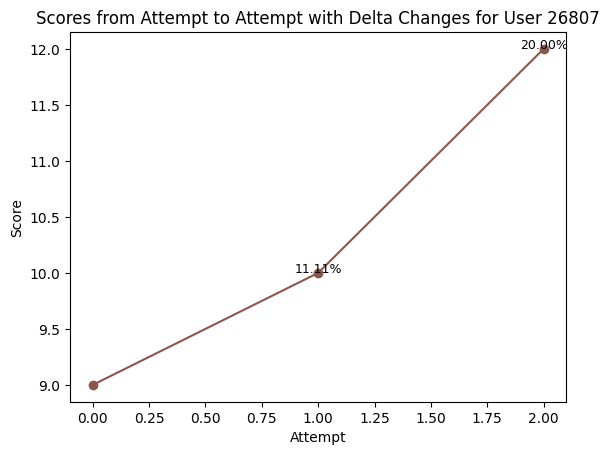

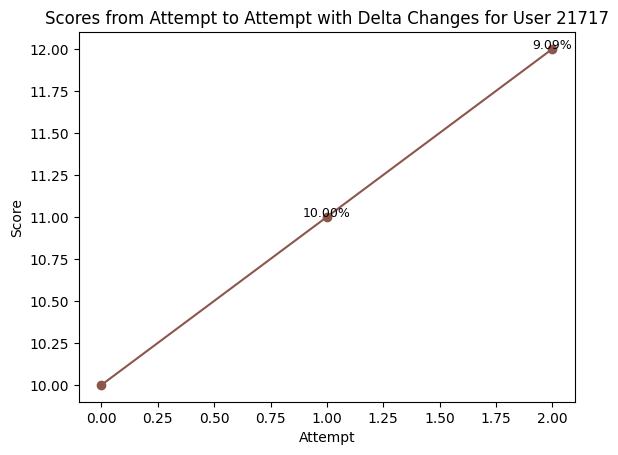

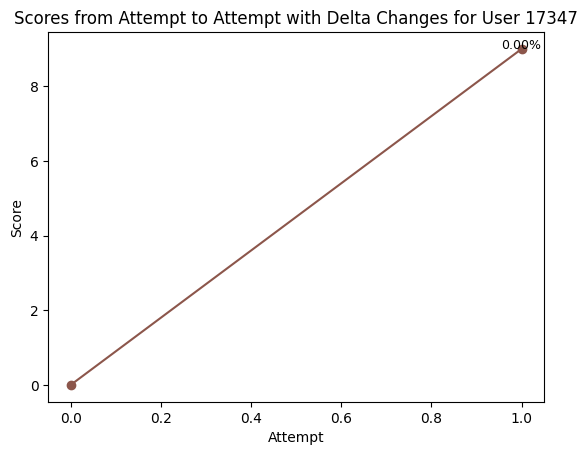

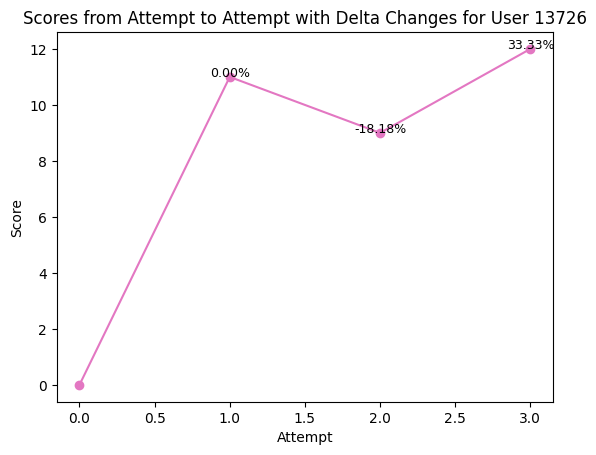

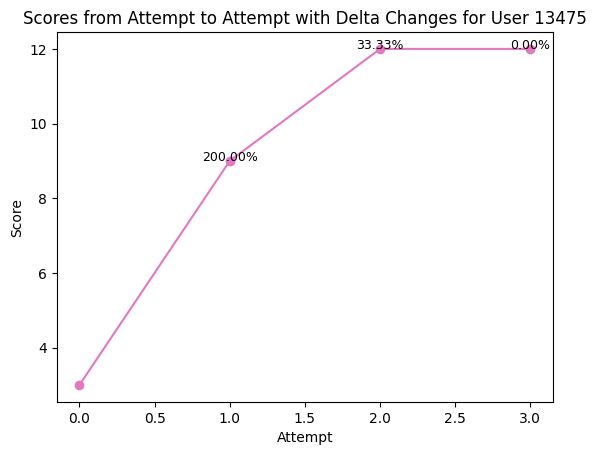

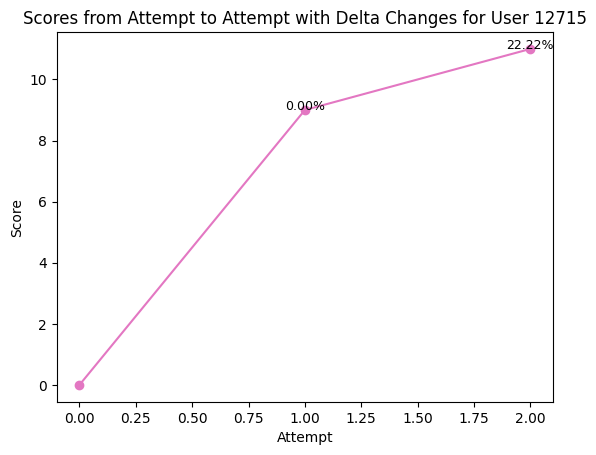

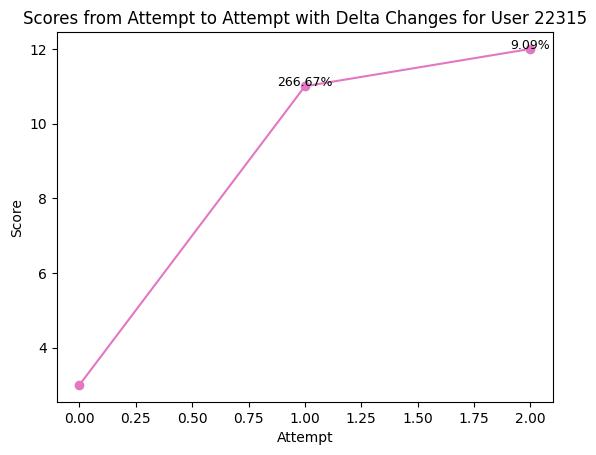

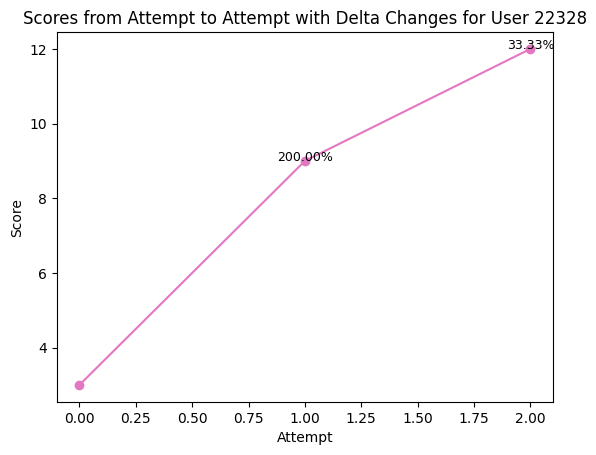

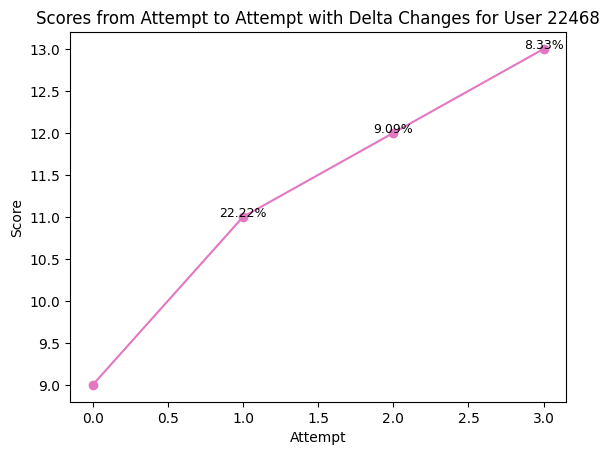

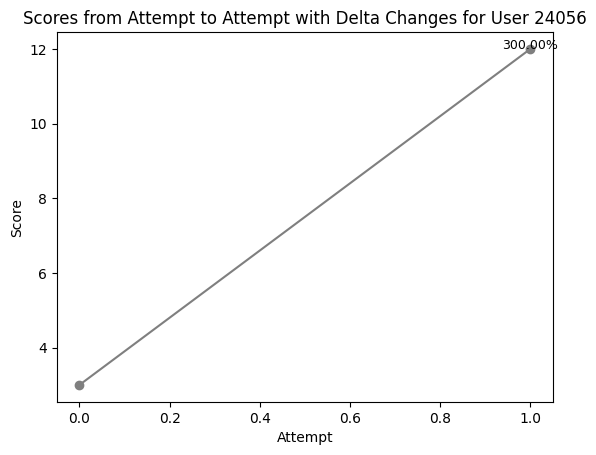

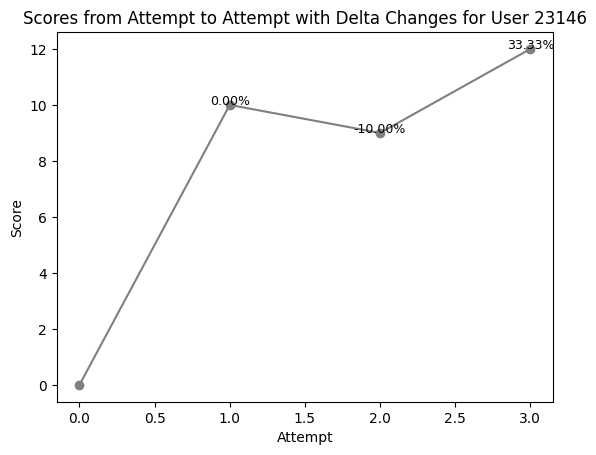

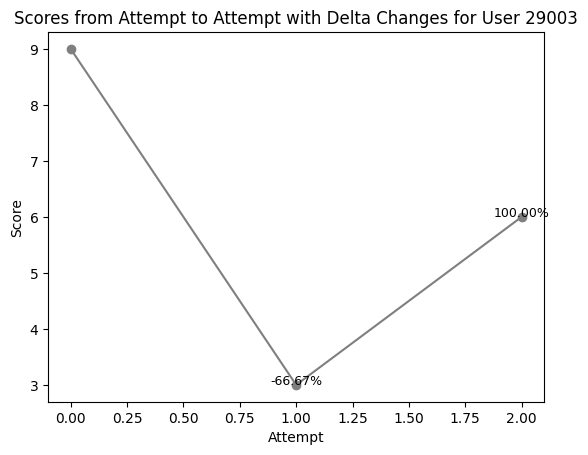

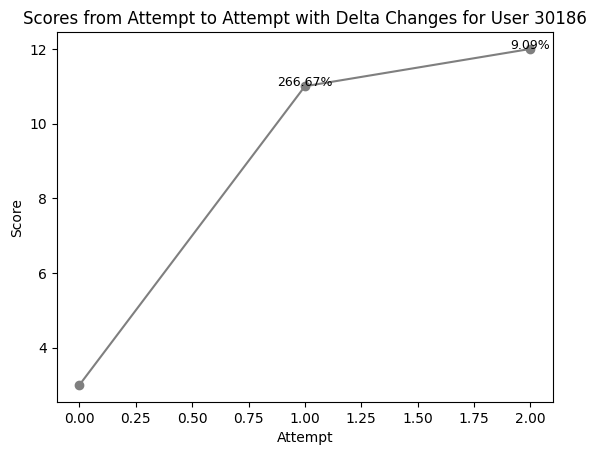

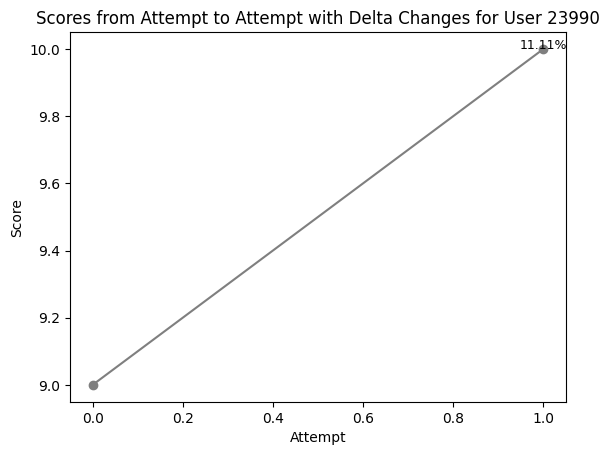

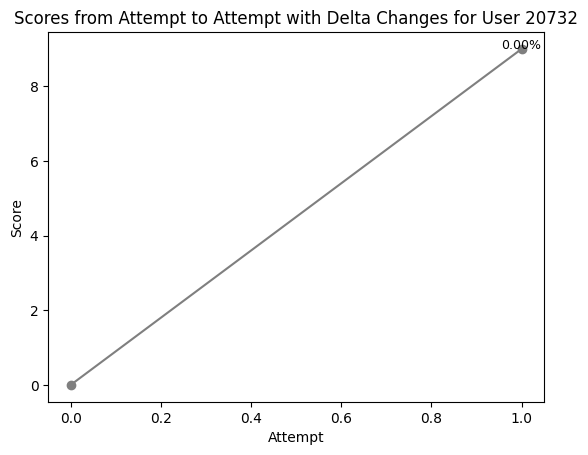

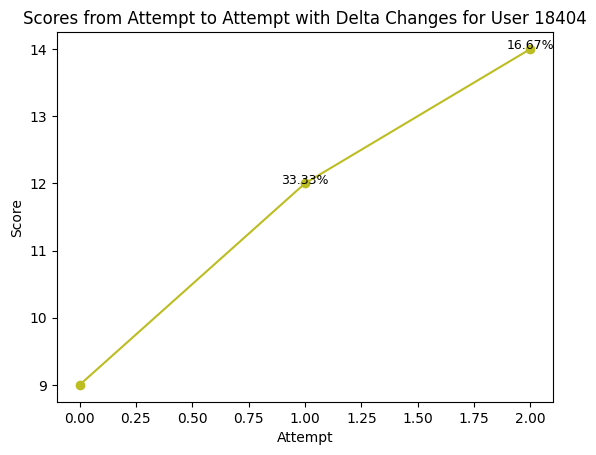

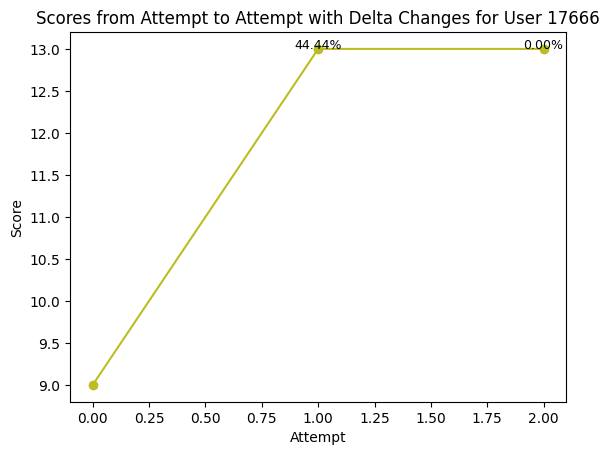

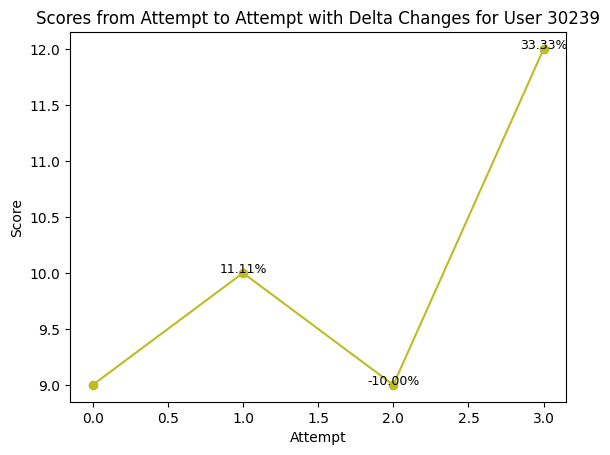

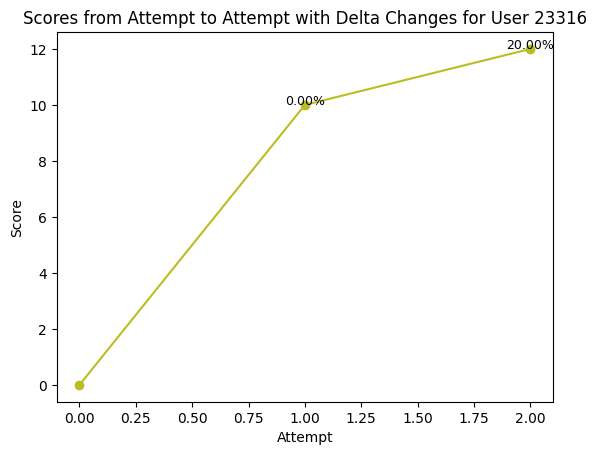

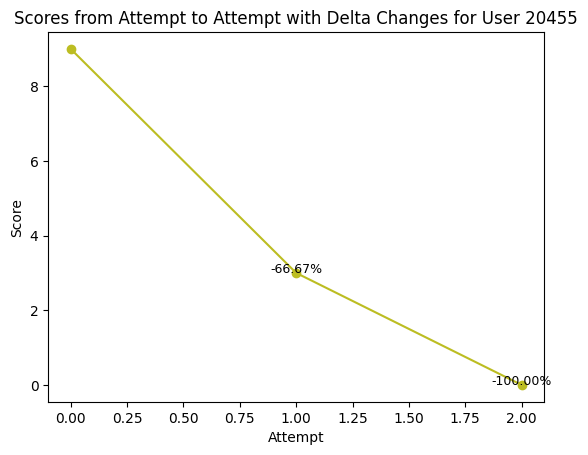

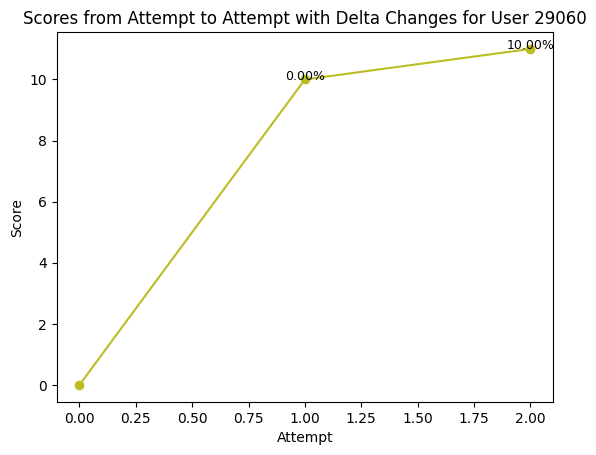

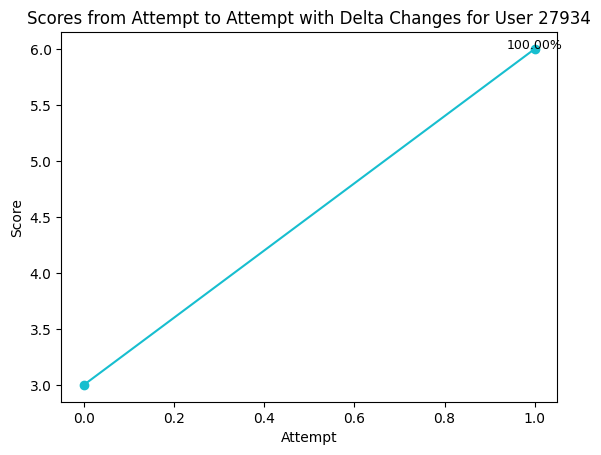

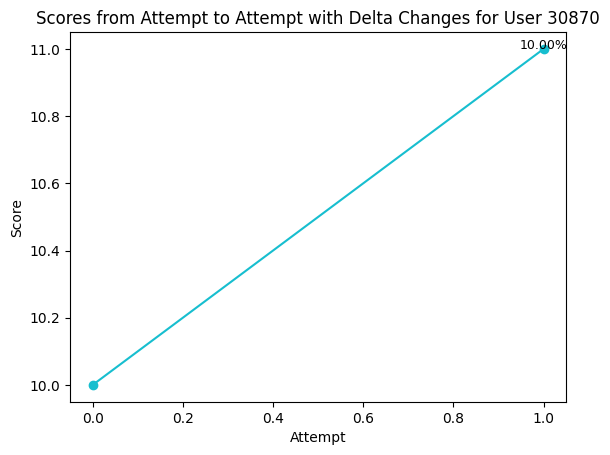

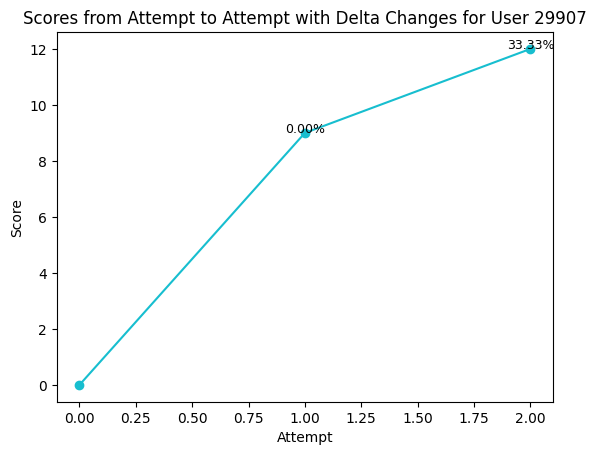

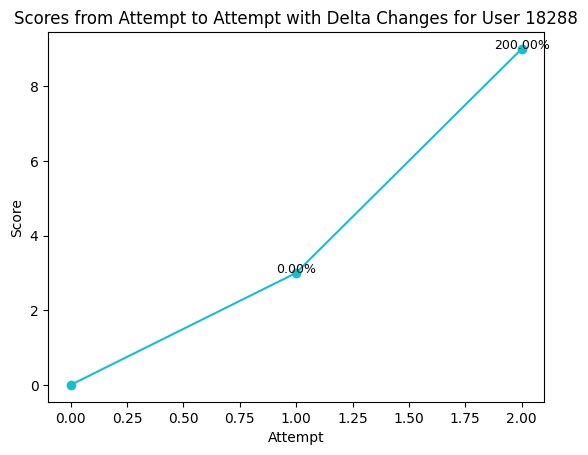

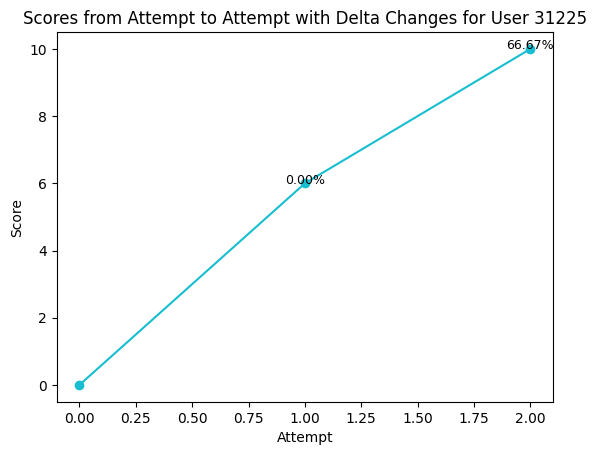

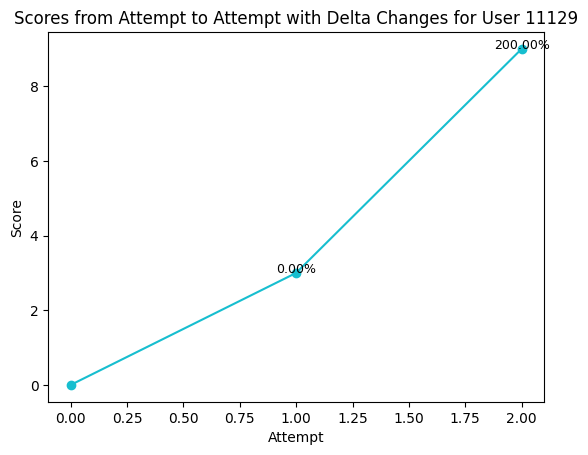

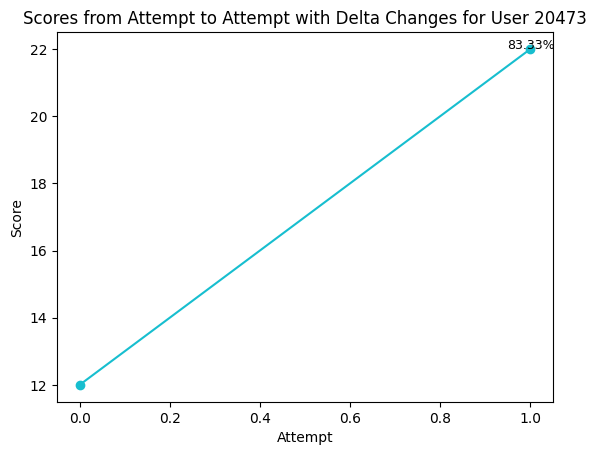

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

def get_unique_colors(users):
    # Create a color map with a unique color for each user
    cmap = plt.get_cmap('tab10', len(users))
    return {user: cmap(i) for i, user in enumerate(users)}

# Get unique colors for each user
user_colors = get_unique_colors(filtered_list.keys())

# Iterate over each user in filtered_list
for user, assignments in filtered_list.items():
    # Initialize a plot for each user
    fig, ax = plt.subplots()
    user_color = user_colors[user]  # Assign a unique color to each user
    
    for assignment, data in assignments.items():
        scores = data['scores']
        delta_changes_percentage = data['delta_changes_percentage']

        # Plot the scores
        ax.plot(range(len(scores)), scores, marker='o', color=user_color)

        # Annotate the delta changes percentage
        for i, delta in enumerate(delta_changes_percentage):
            ax.text(i + 1, scores[i + 1], f'{delta:.2f}%', fontsize=9, ha='center')

    # Add labels and title
    ax.set_xlabel('Attempt')
    ax.set_ylabel('Score')
    ax.set_title(f'Scores from Attempt to Attempt with Delta Changes for User {user}')

    # Display the plot without the legend
    plt.show()

In [96]:
import pandas as pd

# Initialize an empty list to store table rows
table_data = []

# Iterate over each user in filtered_list
for user, assignments in filtered_list.items():
    num_assignments = len(assignments)
    total_attempts = sum(len(data['scores']) for data in assignments.values())
    avg_attempts_per_assignment = total_attempts / num_assignments if num_assignments > 0 else 0
    first_attempt_scores = [data['scores'][0] for data in assignments.values() if data['scores']]
    final_attempt_scores = [data['scores'][-1] for data in assignments.values() if data['scores']]
    avg_first_attempt_score = sum(first_attempt_scores) / len(first_attempt_scores) if first_attempt_scores else 0
    avg_final_attempt_score = sum(final_attempt_scores) / len(final_attempt_scores) if final_attempt_scores else 0
    delta_percentage = ((avg_final_attempt_score - avg_first_attempt_score) / avg_first_attempt_score * 100) if avg_first_attempt_score != 0 else 0
    table_data.append({
        'user_id': user,
        'num_assignments': num_assignments,
        'avg_attempts_per_assignment': avg_attempts_per_assignment,
        'avg_first_attempt_score': avg_first_attempt_score,
        'avg_final_attempt_score': avg_final_attempt_score,
        'delta_percentage': delta_percentage
    })

# Create a DataFrame from the table data
df_table = pd.DataFrame(table_data)

# Display the DataFrame
df_table

,user_id,num_assignments,avg_attempts_per_assignment,avg_first_attempt_score,avg_final_attempt_score,delta_percentage
0,20268,10,2.0,12.400000,19.700000,58.870968
1,23198,4,2.0,15.000000,22.250000,48.333333
2,20592,7,2.0,14.571429,20.428571,40.196078
3,20837,5,2.0,20.400000,31.600000,54.901961
4,18921,1,4.0,9.000000,14.000000,55.555556
...,...,...,...,...,...,...
56,29907,1,3.0,0.000000,12.000000,0.000000
57,18288,1,3.0,0.000000,9.000000,0.000000
58,31225,1,3.0,0.000000,10.000000,0.000000
59,11129,1,3.0,0.000000,9.000000,0.000000
